<img style="padding-right: 25px;" src= "https://raw.githubusercontent.com/e-sensing/sits/master/inst/extdata/sticker/sits_sticker.png" align="left" width="64"/>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64" />

# <span align="center" style="color:#336699" >Working with time series in SITS</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/sits/sits-timeseries-classification.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Rolf Simoes<sup><a href="https://orcid.org/0000-0003-0953-4132"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Souza<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto Camara<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:rolfsimoes@gmail.com">rolfsimoes@gmail.com</a>,  <a href="mailto:lipecaso@gmail.com">lipecaso@gmail.com</a>, <a href="mailto:gilberto.camara.inpe@gmail.com">gilberto.camara.inpe@gmail.com</a>
    <br/><br/>
    Last Update: July 19, 2022
</div>

<br/>

<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;">
<b>Abstract.</b> SITS is an open-source R package for satellite image time series analysis. The package supports the application of machine learning techniques for classification image time series obtained from data cubes.This Jupyter Notebook shows how to work with time series in `sits`. This notebook corresponds to the chapter "Working with Time Series" in the <a href="https://e-sensing.github.io/sitsbook/" target="_blank"> book on the SITS package</a>.
</div>    

<br/>
<div style="text-align: justify;  margin-left: 15%; margin-right: 15%;font-size: 100%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>For a comprehensive sits overview and discussion, please, refer to the online book:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Simoes, R; Camara, G.; Souza, F.; Santos, L.; Andrade, P.; Carvalho, A.; Pelletier, C.; Ferreira, K.; Queiroz, G. <a href="https://e-sensing.github.io/sitsbook/" target="_blank">sits: Satellite Image Time Series</a>.
    </div>
</div>

## Data structures for satellite time series
<hr style="border:1px solid #0077b9;">

The `sits` package requires a set of time series data, describing properties in spatiotemporal locations of interest. For land use classification, this set consists of samples provided by experts that take in-situ field observations or recognize land classes using high-resolution images. The package can also be used for any type of classification, provided that the timeline and bands of the time series (used for training) match that of the data cubes. 

For handling time series, the package uses a `sits tibble` to organize time series data with associated spatial information. A `tibble` is a generalization of a `data.frame`, the usual way in R to organize data in tables. 

As an example of how the sits tibble works, the following code shows the first three lines of a tibble containing 1,892 labeled samples of land cover in Mato Grosso state of Brazil. The samples contain time series extracted from the MODIS MOD13Q1 product from 2000 to 2016, provided every 16 days at 250-meter resolution in the sinusoidal projection. Based on ground surveys and high-resolution imagery, it includes samples of nine classes: `"Forest"`, `"Cerrado"`, `"Pasture"`, `"Soybean-fallow"`, `"Fallow-Cotton"`, `"Soybean-Cotton"`, `"Soybean-Corn"`, `"Soybean-Millet"`, and `"Soybean-Sunflower"`. This dataset is available in the `sitsdata` package.

To run this notebook, we will start by loading the `sits` and `sitsdata` packages:

In [25]:
# load sits
library(sits)
library(sitsdata)

In [2]:
# select a set of time series samples
data("samples_matogrosso_mod13q1")

print(samples_matogrosso_mod13q1[1:3,])

# A tibble: 3 × 7
  longitude latitude start_date end_date   label   cube     time_series      
      <dbl>    <dbl> <date>     <date>     <chr>   <chr>    <list>           
1     -57.8    -9.76 2006-09-14 2007-08-29 Pasture bdc_cube <tibble [23 × 5]>
2     -59.4    -9.31 2014-09-14 2015-08-29 Pasture bdc_cube <tibble [23 × 5]>
3     -59.4    -9.31 2013-09-14 2014-08-29 Pasture bdc_cube <tibble [23 × 5]>


#### A sits tibble contains data and metadata. The first six columns contain the metadata: spatial and temporal information, the label assigned to the sample, and the data cube from where the data has been extracted.

In [3]:
samples_matogrosso_mod13q1[1,]$time_series[[1]][1:5,]

Index,NDVI,EVI,NIR,MIR
<date>,<dbl>,<dbl>,<dbl>,<dbl>
2006-09-14,0.4995,0.2628,0.2298,0.1392
2006-09-30,0.4853,0.3299,0.3585,0.1608
2006-10-16,0.7161,0.3968,0.2642,0.0757
2006-11-01,0.6536,0.4150,0.3321,0.1239
2006-11-17,0.5911,0.4332,0.4001,0.1722


#### The `time_series` column contains the time series data for each spatiotemporal location. This data is also organized as a tibble, with a column with the dates and the other columns with the values for each spectral band. 

## Time series description and visualization
<hr style="border:1px solid #0077b9;">



In [4]:
# show the labels of the sample set and their frequencies
sits_labels_summary(samples_matogrosso_mod13q1)

label,count,prop
<chr>,<int>,<dbl>
Cerrado,379,0.20031712
Fallow_Cotton,29,0.01532770
Forest,131,0.06923890
Pasture,344,0.18181818
Soy_Corn,364,0.19238901
Soy_Cotton,352,0.18604651
Soy_Fallow,87,0.04598309
Soy_Millet,180,0.09513742
Soy_Sunflower,26,0.01374207


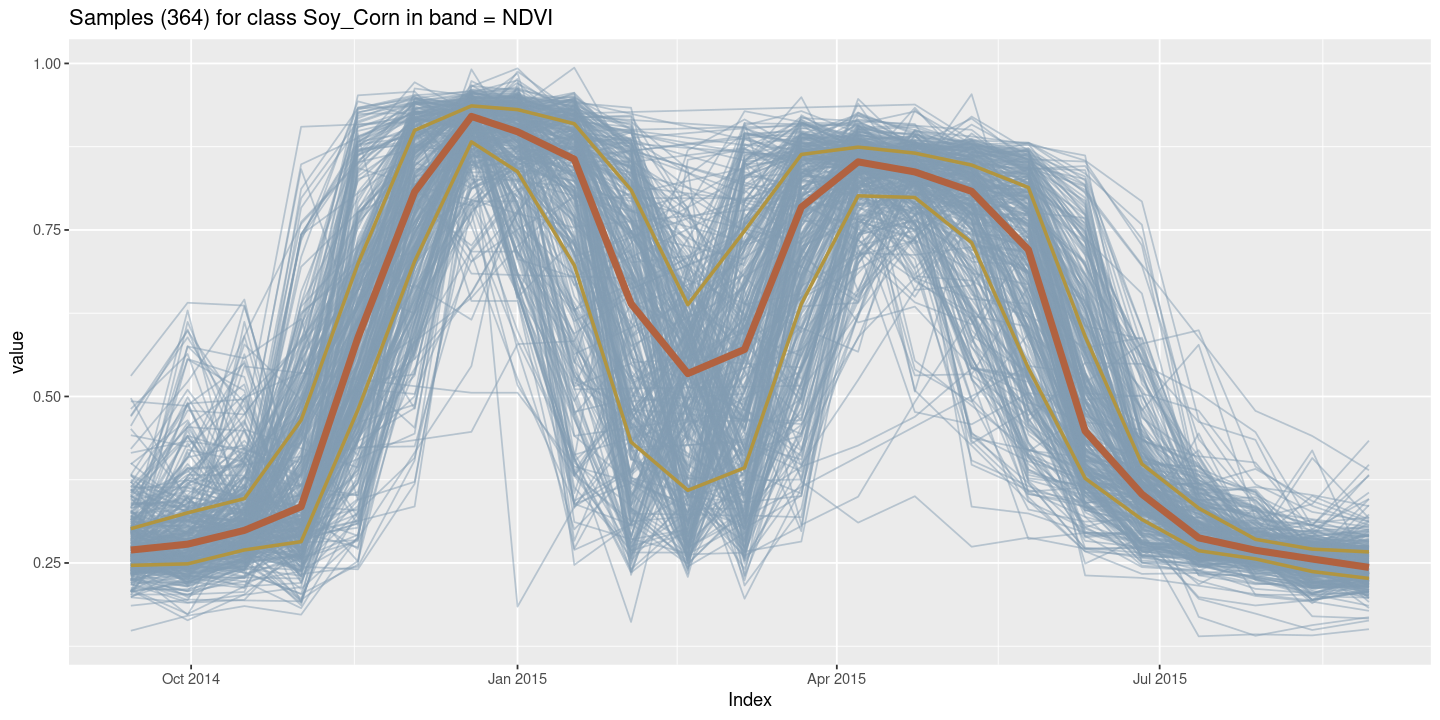

In [5]:
# select only the values of the time series for band NDVI
samples_ndvi <- sits_select(samples_matogrosso_mod13q1, bands = "NDVI")

# select only samples with Soy_Corn label
samples_soy_corn <- dplyr::filter(samples_ndvi, label == "Soy_Corn")

# plot the samples with the Soy_Corn label
options(repr.plot.width = 12, repr.plot.height = 6)
plot(samples_soy_corn)

## Obtaining time series data from data cubes
<hr style="border:1px solid #0077b9;">

To obtain a time series, users need access to a data cube or to a data cube services. In this section, we show an example of obtaining time series for the Web Time Series Service (WTSS) which is provided by the Brazil Data Cube (BDC)

> #### A useful case is when a set of labelled samples are available as a CSV file. For each training sample, CSV files should provide latitude and longitude, start and end dates that define the temporal bounds, and a label associated with a ground sample. 

In [6]:
# retrieve a list of samples described by a CSV file
samples_csv_file <- system.file(
    "extdata/csv/validation_amazonia_sentinel2_sample.csv",
    package = "sitsdata"
)

# read the csv as a data frame to see its contents
csv_data <- read.csv(samples_csv_file)

# show the first three lines
print(csv_data[1:3,])

  longitude  latitude        label start_date   end_date
1 -65.05572 -10.86184       Forest 2018-07-12 2019-07-28
2 -64.60790  -9.97576      Pasture 2018-07-12 2019-07-28
3 -64.08070 -10.56020 NatNonForest 2018-07-12 2019-07-28


> #### Note: To access the Brazil Data Cube, you will need a token. Please register at the BDC site and get your token. For more details, see the [instructions](https://brazil-data-cube.github.io/applications/dc_explorer/token-module.html).

In [26]:
Sys.setenv(BDC_ACCESS_KEY = "change-me")

To get a time series in sits, one has to access a data cube. Users can request one or more time series points from a data cube by using `sits_get_data()`. 

We will create a data cube based on the Web Time Series Service (WTSS) available in the Brazil Data Cube (BDC). 
The example uses the "S2_10_16D_STK-1" collection (Sentinel-2, 16 days) available over the Brazilian Amazon. We use only one tile for better efficiency

In [8]:
# add new class to the data.frame
class(csv_data) <- c("sits", class(csv_data))

# get bbox of samples
samples_roi <- sf::st_bbox(sits_as_sf(csv_data))

# create a data cube based on a collection in the BDC
s2_cube <- sits_cube(
    source     = "BDC",
    collection = "S2-SEN2COR_10_16D_STK-1",
    start_date = "2018-07-12",
    end_date   = "2019-07-28",
    roi        = samples_roi
)

  |======================================================================| 100%


## Using CSV files to obtain time series
<hr style="border:1px solid #0077b9;">

Given a suitably built CSV sample file, `sits_get_data()` requires two parameters: 
- (a) `cube`, the name of the R object that describes the data cube
- (b) `samples`, the name of the CSV file or tibble containing samples.

In [9]:
# get the points from a data cube in raster brick format
points <- sits_get_data(
    cube       = s2_cube, 
    samples    = samples_csv_file,
    bands      = c("NDVI", "EVI", "CLOUD"),
    multicores = 4
)

# show the tibble with the first three points
print(points[1:3,])

All points have been retrieved



# A tibble: 3 × 7
  longitude latitude start_date end_date   label   cube                 time_s…¹
      <dbl>    <dbl> <date>     <date>     <chr>   <chr>                <list>  
1     -65.2    -10.6 2018-07-12 2019-07-28 Pasture S2-SEN2COR_10_16D_S… <tibble>
2     -65.2    -10.4 2018-07-12 2019-07-28 Pasture S2-SEN2COR_10_16D_S… <tibble>
3     -65.2    -10.3 2018-07-12 2019-07-28 Forest  S2-SEN2COR_10_16D_S… <tibble>
# … with abbreviated variable name ¹​time_series


In [10]:
sits_timeline(s2_cube)

[1] "2018-07-12" "2018-07-28" "2018-08-13" "2018-08-29" "2018-09-14"
 [6] "2018-09-30" "2018-10-16" "2018-11-01" "2018-11-17" "2018-12-03"
[11] "2018-12-19" "2019-01-01" "2019-01-17" "2019-02-02" "2019-02-18"
[16] "2019-03-06" "2019-03-22" "2019-04-07" "2019-04-23" "2019-05-09"
[21] "2019-05-25" "2019-06-10" "2019-06-26" "2019-07-12" "2019-07-28"

## Using SHP files to obtain time series
<hr style="border:1px solid #0077b9;">

Users can also specify samples by providing shapefiles in point or polygon format. In this case, the geographical location is inferred from the geometries associated with the shapefile. 
For POINT shapefiles, the geographical location is obtained directly for POLYGON shapefiles, the parameter `.n_shp_pol` determines the number of samples to be extracted from each polygon. The temporal information is inferred from the data cube or provided explicitly by the user. 

The label information is taken from the attribute file associated with the  shapefile. The parameter `shp_attr` indicates the name of the column which contains the label to be associated with each time series. Users can also provide a label if desired. 

In [15]:
mod13q1_cube <- sits_cube(
    source = "BDC",
    collection = "MOD13Q1-6",
    roi = samples_roi,
    start_date = "2013-09-14",
    end_date   = "2014-08-29"
)

  |======================================================================| 100%


In [17]:
sits_timeline(mod13q1_cube)

[1] "2013-09-14" "2013-09-30" "2013-10-16" "2013-11-01" "2013-11-17"
 [6] "2013-12-03" "2013-12-19" "2014-01-01" "2014-01-17" "2014-02-02"
[11] "2014-02-18" "2014-03-06" "2014-03-22" "2014-04-07" "2014-04-23"
[16] "2014-05-09" "2014-05-25" "2014-06-10" "2014-06-26" "2014-07-12"
[21] "2014-07-28" "2014-08-13" "2014-08-29"

In [23]:
# define the input shapefile
shp_file <- system.file("extdata/shapefiles/cerrado_araguaia/cerrado_araguaia.shp", 
                        package = "sitsdata")

# get samples bbox
samples_roi <- sf::st_bbox(sf::read_sf(shp_file))

# define a WTSS cube with access to MODIS data 
mod13q1_cube <- sits_cube(
    source = "BDC",
    collection = "MOD13Q1-6",
    roi = samples_roi,
    bands = "NDVI",
    start_date = "2013-09-14",
    end_date   = "2013-11-14"
)

# read the points in the shapefile and produce a CSV file
samples <- sits_get_data(
    cube       = mod13q1_cube, 
    samples    = shp_file,
    label      = "Cerrado_Woodlands", 
    start_date = "2013-09-14",
    end_date   = "2013-11-14",
    multicores = 4
)
print(samples[1:3,])

  |======================================================================| 100%


All points have been retrieved



# A tibble: 3 × 7
  longitude latitude start_date end_date   label             cube      time_se…¹
      <dbl>    <dbl> <date>     <date>     <chr>             <chr>     <list>   
1     -51.6    -13.5 2013-09-14 2013-11-01 Cerrado_Woodlands MOD13Q1-6 <tibble> 
2     -51.6    -13.5 2013-09-14 2013-11-01 Cerrado_Woodlands MOD13Q1-6 <tibble> 
3     -51.5    -14.0 2013-09-14 2013-11-01 Cerrado_Woodlands MOD13Q1-6 <tibble> 
# … with abbreviated variable name ¹​time_series


## Filtering time series 
<hr style="border:1px solid #0077b9;">

The package supports the Savitzky–Golay (`sits_sgolay()`) and Whittaker (`sits_whittaker()`) filters. Take NDVI band of the first sample data set.

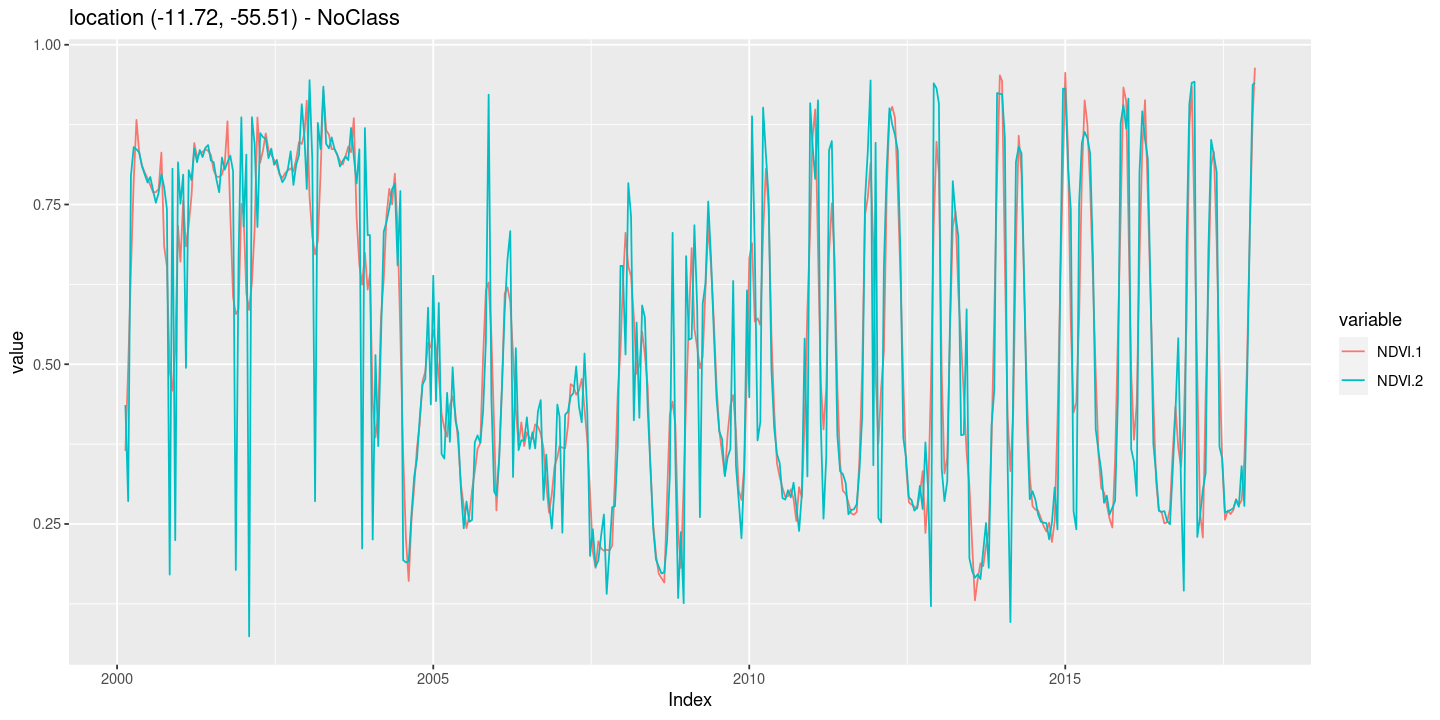

In [19]:
point_ndvi <- sits_select(point_mt_6bands, band = "NDVI")

# apply Savitzky–Golay filter
point_sg <- sits_sgolay(point_ndvi, length = 7)

# merge the point and plot the series
sits_merge(point_sg, point_ndvi) %>% plot()